In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
transc = pd.read_csv("QVI_transaction_data.csv")
transc.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17/10/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14/5/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20/5/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17/8/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18/8/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [286]:
transc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [287]:
transc[transc.duplicated(keep = False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,1/10/2018,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,1/10/2018,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [288]:
transc.drop_duplicates(inplace = True)

In [289]:
transc.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [290]:
purc_beha = pd.read_csv("QVI_purchase_behaviour.csv")
purc_beha.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [291]:
purc_beha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [292]:
purc_beha.duplicated().sum()

0

In [293]:
purc_beha.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [294]:
# merge data on "LYLTY_CARD_NBR"

In [295]:
merged_df = transc.merge(purc_beha, on = "LYLTY_CARD_NBR", how = "left")
merged_df.head()
merged_df.shape # same row number of transaction df

(264835, 10)

In [296]:
merged_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [297]:
merged_df.mode()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,24/12/2018,226.0,162039.0,1162,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,9.2,OLDER SINGLES/COUPLES,Mainstream
1,NaN,NaN,172032.0,102237,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,211119,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,222775,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,228741,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,230356,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  object 
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   LIFESTAGE         264835 non-null  object 
 9   PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 22.2+ MB


In [299]:
# checking if we are looking for the correct product-CHIPS
merged_df["PROD_NAME"].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [300]:
merged_df["PREMIUM_CUSTOMER"].unique()

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [301]:
merged_df["LIFESTAGE"].unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

In [302]:
# identify the outlier and remove it
merged_df["TOT_SALES"].describe()

merged_df[merged_df["TOT_SALES"]== 650]

# to check the customer has other transaction
merged_df[merged_df["LYLTY_CARD_NBR"]== 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,19/8/2018,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,20/5/2019,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


In [303]:
# split the pack size

# merged_df[["Brand name", "Pack size"]]= merged_df["PROD_NAME"].str.extract(r"^(.*?)(\d+g)$")

merged_df["Pack size"] = merged_df["PROD_NAME"].str.extract(r"(\d+)")
merged_df["Pack size"] = merged_df["Pack size"].astype(int)
merged_df = merged_df.sort_values(by= "Pack size")


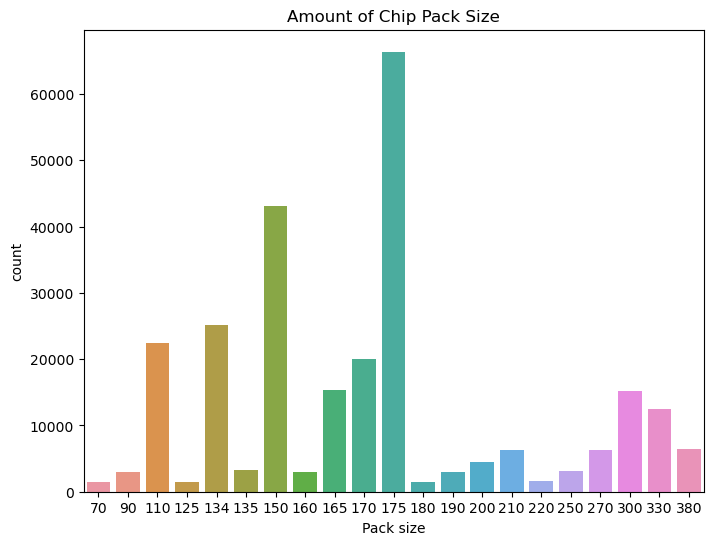

In [304]:
# plot the histogram 
plt.figure(figsize = (8,6))
sns.countplot(data = merged_df, x = "Pack size")
plt.title("Amount of Chip Pack Size")
plt.show()

In [305]:
# the 226000 customer only has 2 transaction on huge purchase, we can remove those from analysis as the customer is not ordinary retail
cleaned_df = merged_df[merged_df["TOT_SALES"]!= 650]
cleaned_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Pack size
213926,7/3/2019,209,209065,207863,38,Infuzions Mango Chutny Papadums 70g,2,4.8,YOUNG FAMILIES,Mainstream,70
87947,23/12/2018,102,102014,101601,38,Infuzions Mango Chutny Papadums 70g,2,4.8,OLDER SINGLES/COUPLES,Budget,70
87945,4/4/2019,102,102004,101550,38,Infuzions Mango Chutny Papadums 70g,2,4.8,OLDER SINGLES/COUPLES,Budget,70
87929,9/4/2019,101,101230,101354,38,Infuzions Mango Chutny Papadums 70g,2,4.8,OLDER SINGLES/COUPLES,Budget,70
175101,25/7/2018,63,63039,59598,38,Infuzions Mango Chutny Papadums 70g,2,4.8,RETIREES,Premium,70


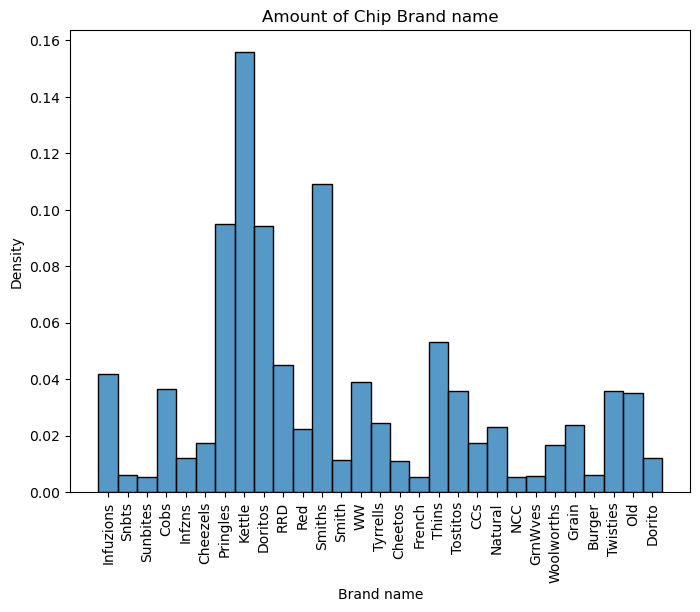

In [306]:
# split the brand name

merged_df["Brand name"]= merged_df["PROD_NAME"].str.split().str[0]

# plot the histogram 
plt.figure(figsize = (8,6))
sns.histplot(data = merged_df, x = "Brand name", stat='density')
plt.title("Amount of Chip Brand name")
plt.xticks(rotation = 90)
plt.show()

In [307]:
# count the transaction number by date

# covert date to datetime format
merged_df["DATE"] = pd.to_datetime(merged_df["DATE"], format = "%d/%m/%Y")

date_count = merged_df["DATE"].value_counts().reset_index()
date_count.columns = ["DATE","Total Count"]
date_count.sort_values(by= "DATE") 


,DATE,Total Count
185,2018-07-01,724
250,2018-07-02,711
196,2018-07-03,722
230,2018-07-04,714
239,2018-07-05,712
...,...,...
193,2019-06-26,723
259,2019-06-27,709
158,2019-06-28,730
90,2019-06-29,745


In [308]:
# there is only 364 row, which means there are missing value ( total 365 days in a year), Let's find out where is the missing value

# create a full range of date from 1 Jul 2018 to 30 Jun 2019

all_date_range = pd.date_range(start = '2018-07-01', end='2019-06-30')
all_date_range_df = pd.DataFrame(all_date_range,columns = ["Date"])
all_date_range_df


# covert date to datetime format
merged_df["DATE"] = pd.to_datetime(merged_df["DATE"], format = "%d%m%Y")

missing_date = all_date_range_df[~all_date_range_df["Date"].isin(merged_df["DATE"])]
print("missing date is :\n",missing_date)

missing date is :
           Date
177 2018-12-25


In [309]:
pro_sales = cleaned_df.groupby(["PROD_NAME", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum()
sorted_df = pro_sales.sort_values(ascending = False).head(10).reset_index()
sorted_df


,PROD_NAME,PREMIUM_CUSTOMER,TOT_SALES
0,Dorito Corn Chp Supreme 380g,Mainstream,15366.00
1,Smiths Crnkle Chip Orgnl Big Bag 380g,Mainstream,14673.30
2,Smiths Crinkle Chips Salt & Vinegar 330g,Mainstream,13965.00
3,Cheezels Cheese 330g,Mainstream,13320.90
4,Kettle Mozzarella Basil & Pesto 175g,Mainstream,13300.20
5,Smiths Crinkle Original 330g,Mainstream,13281.00
6,Doritos Cheese Supreme 330g,Mainstream,13189.80
7,Kettle Honey Soy Chicken 175g,Mainstream,13073.40
8,Dorito Corn Chp Supreme 380g,Budget,13068.25
9,Kettle Sweet Chilli And Sour Cream 175g,Mainstream,12916.80


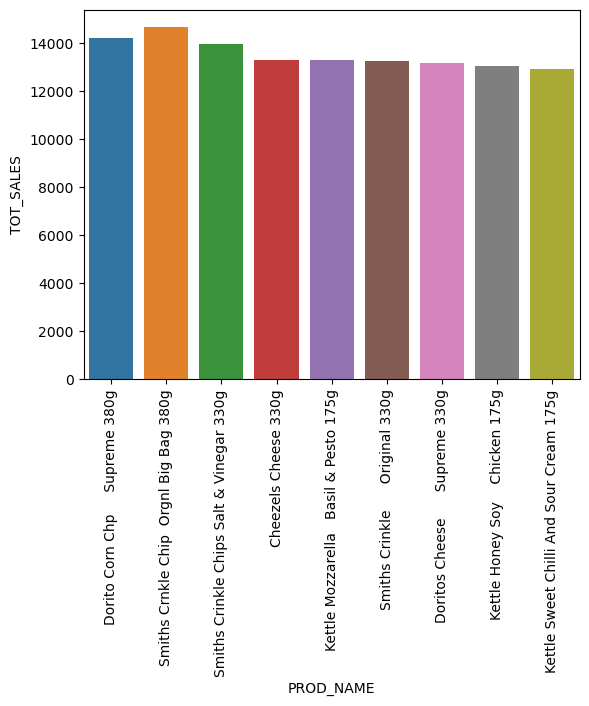

In [310]:
sns.barplot(data=sorted_df, x="PROD_NAME", y="TOT_SALES", errorbar= None )
plt.xticks(rotation = 90)
plt.show()

In [311]:
# the 226000 customer only has 2 transaction on huge purchase, we can remove those from analysis as the customer is not ordinary retail
cleaned_df = merged_df[merged_df["TOT_SALES"]!= 650]
cleaned_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Pack size,Brand name
213926,2019-03-07,209,209065,207863,38,Infuzions Mango Chutny Papadums 70g,2,4.8,YOUNG FAMILIES,Mainstream,70,Infuzions
87947,2018-12-23,102,102014,101601,38,Infuzions Mango Chutny Papadums 70g,2,4.8,OLDER SINGLES/COUPLES,Budget,70,Infuzions
87945,2019-04-04,102,102004,101550,38,Infuzions Mango Chutny Papadums 70g,2,4.8,OLDER SINGLES/COUPLES,Budget,70,Infuzions
87929,2019-04-09,101,101230,101354,38,Infuzions Mango Chutny Papadums 70g,2,4.8,OLDER SINGLES/COUPLES,Budget,70,Infuzions
175101,2018-07-25,63,63039,59598,38,Infuzions Mango Chutny Papadums 70g,2,4.8,RETIREES,Premium,70,Infuzions


In [312]:
qty_sales = cleaned_df.groupby(["Brand name", "PREMIUM_CUSTOMER","PROD_QTY"])
qty_df = pro_sales.sort_values(ascending = False).head(10).reset_index()
qty_df

,PROD_NAME,PREMIUM_CUSTOMER,TOT_SALES
0,Dorito Corn Chp Supreme 380g,Mainstream,15366.00
1,Smiths Crnkle Chip Orgnl Big Bag 380g,Mainstream,14673.30
2,Smiths Crinkle Chips Salt & Vinegar 330g,Mainstream,13965.00
3,Cheezels Cheese 330g,Mainstream,13320.90
4,Kettle Mozzarella Basil & Pesto 175g,Mainstream,13300.20
5,Smiths Crinkle Original 330g,Mainstream,13281.00
6,Doritos Cheese Supreme 330g,Mainstream,13189.80
7,Kettle Honey Soy Chicken 175g,Mainstream,13073.40
8,Dorito Corn Chp Supreme 380g,Budget,13068.25
9,Kettle Sweet Chilli And Sour Cream 175g,Mainstream,12916.80


In [313]:
qty_df = cleaned_df[["Brand name", "PREMIUM_CUSTOMER", "PROD_QTY"]].value_counts().reset_index()

In [314]:
qty_df.sort_values(by = "PROD_QTY")

,Brand name,PREMIUM_CUSTOMER,PROD_QTY,0
144,Infzns,Mainstream,1,131
63,Pringles,Mainstream,1,1053
115,Old,Budget,1,309
116,Tostitos,Budget,1,304
117,Infuzions,Premium,1,285
...,...,...,...,...
343,Burger,Mainstream,5,2
271,Dorito,Mainstream,5,5
237,Cobs,Mainstream,5,6
338,CCs,Premium,5,2


## Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

In [315]:
lifestage_sales = cleaned_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
lifestage_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,80658.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


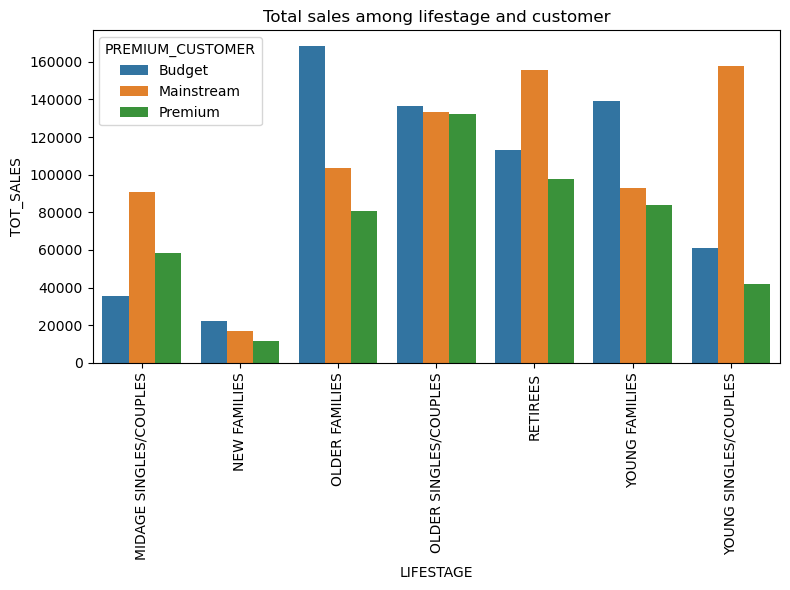

In [316]:
plt.figure(figsize = (8,6))
sns.barplot(data = lifestage_sales, x ="LIFESTAGE", y ="TOT_SALES", hue= "PREMIUM_CUSTOMER", errorbar= None)
plt.title("Total sales among lifestage and customer")
plt.xticks(rotation = 90)
plt.tight_layout()

## Heatmap

In [317]:
pivot_lifestage_sales = lifestage_sales.pivot("LIFESTAGE","PREMIUM_CUSTOMER", "TOT_SALES")
pivot_lifestage_sales

C:\Users\User\AppData\Local\Temp\ipykernel_22812\394758117.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_lifestage_sales = lifestage_sales.pivot("LIFESTAGE","PREMIUM_CUSTOMER", "TOT_SALES")


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,35514.80,90803.85,58432.65
NEW FAMILIES,21928.45,17013.90,11491.10
OLDER FAMILIES,168363.25,103445.55,80658.40
OLDER SINGLES/COUPLES,136769.80,133393.80,132257.15
RETIREES,113147.80,155677.05,97646.05
YOUNG FAMILIES,139345.85,92788.75,84025.50
YOUNG SINGLES/COUPLES,61141.60,157621.60,41642.10


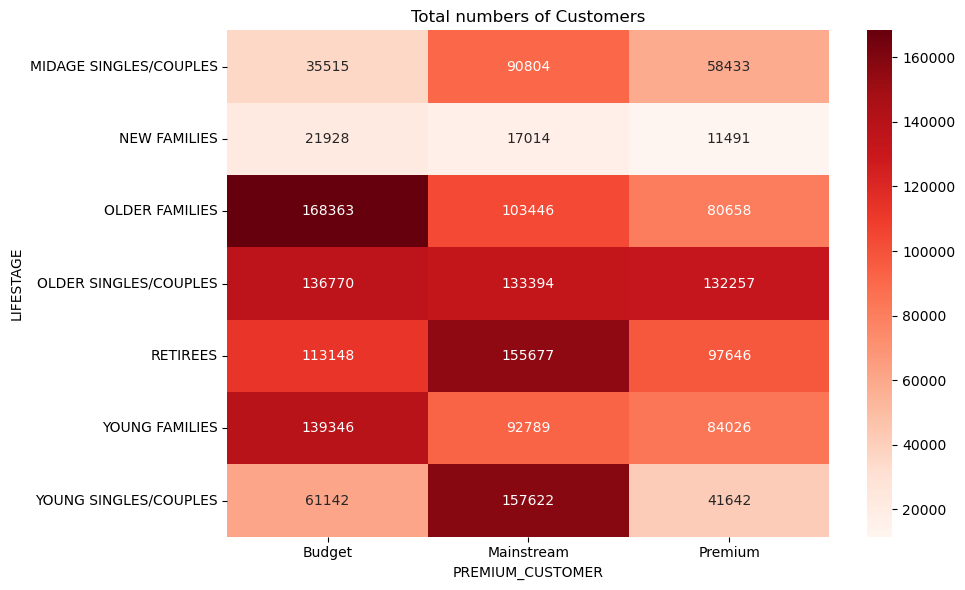

In [318]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_lifestage_sales, annot=True, fmt='.0f', cmap='Reds')
plt.title("Total numbers of Customers")
plt.tight_layout()

## The Sales are coming from Budget- Older families, Mainstream-Retirees annd Mainstream- Young Singles/Couples

## The Higher sales are due to there being more customers who buy chips?

In [319]:
print(cleaned_df["LYLTY_CARD_NBR"].nunique())

print(cleaned_df["LYLTY_CARD_NBR"].count()) # duplicated card_nbr


72636
264833


In [320]:
customer_segments = cleaned_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().reset_index()
customer_segments["porpotion of customers"]= (customer_segments["LYLTY_CARD_NBR"]/72636)
customer_segments = customer_segments.sort_values(by = "LYLTY_CARD_NBR",ascending = False)
customer_segments

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,porpotion of customers
19,YOUNG SINGLES/COUPLES,Mainstream,8088,0.111350
13,RETIREES,Mainstream,6479,0.089198
10,OLDER SINGLES/COUPLES,Mainstream,4930,0.067873
9,OLDER SINGLES/COUPLES,Budget,4929,0.067859
11,OLDER SINGLES/COUPLES,Premium,4750,0.065395
6,OLDER FAMILIES,Budget,4675,0.064362
12,RETIREES,Budget,4454,0.061319
15,YOUNG FAMILIES,Budget,4017,0.055303
14,RETIREES,Premium,3872,0.053307
18,YOUNG SINGLES/COUPLES,Budget,3779,0.052027


In [321]:
pivot_customer_segments= customer_segments.pivot("LIFESTAGE","PREMIUM_CUSTOMER","porpotion of customers")
pivot_customer_segments

C:\Users\User\AppData\Local\Temp\ipykernel_22812\2993651708.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_customer_segments= customer_segments.pivot("LIFESTAGE","PREMIUM_CUSTOMER","porpotion of customers")


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,0.020706,0.045983,0.033468
NEW FAMILIES,0.015309,0.011688,0.008095
OLDER FAMILIES,0.064362,0.038975,0.031293
OLDER SINGLES/COUPLES,0.067859,0.067873,0.065395
RETIREES,0.061319,0.089198,0.053307
YOUNG FAMILIES,0.055303,0.037557,0.033496
YOUNG SINGLES/COUPLES,0.052027,0.111350,0.035437


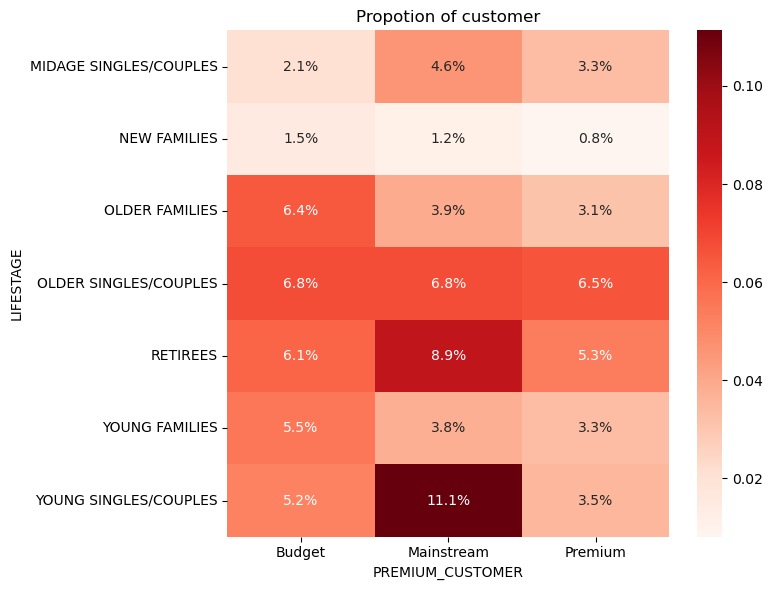

In [322]:
plt.figure(figsize = (8,6))
sns.heatmap(pivot_customer_segments, annot = True, fmt= ".1%",cmap='Reds')
plt.title("Propotion of customer")
plt.tight_layout()

## There are more Mainstream Retirees and Young singles/couples buy chips. This contribute to there being more sales to these customer segments but it's not the major driver for Budget- Older families

## How many chips are bought per customer by segment?

In [323]:
avg_unit_sales = cleaned_df.groupby(["LYLTY_CARD_NBR","LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum().reset_index()
avg_unit_sales

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,1000,YOUNG SINGLES/COUPLES,Premium,2
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1
2,1003,YOUNG FAMILIES,Budget,2
3,1004,OLDER SINGLES/COUPLES,Mainstream,1
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,1
...,...,...,...,...
72631,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2
72632,2370701,YOUNG FAMILIES,Mainstream,2
72633,2370751,YOUNG FAMILIES,Premium,2
72634,2370961,OLDER FAMILIES,Budget,4


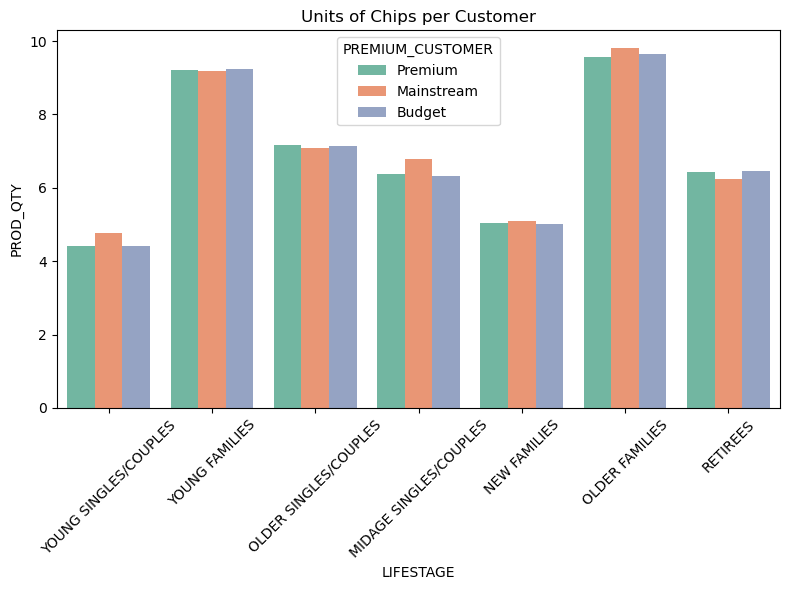

In [324]:
plt.figure(figsize = (8,6))
sns.barplot(data =avg_unit_sales, x ="LIFESTAGE", y ="PROD_QTY", hue = "PREMIUM_CUSTOMER", errorbar= None, palette="Set2")
plt.title("Units of Chips per Customer")
plt.xticks(rotation = 45)
plt.tight_layout()


# What’s the average chip price by customer segment?

In [325]:
avg_prices_sales = cleaned_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({"TOT_SALES":"sum", "PROD_QTY":"sum"}).reset_index()
avg_prices_sales["avg_unit_prices"] = avg_prices_sales["TOT_SALES"]/avg_prices_sales["PROD_QTY"]
avg_prices_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,avg_unit_prices
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,9496,3.739975
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,22699,4.000346
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,15526,3.763535
3,NEW FAMILIES,Budget,21928.45,5571,3.936178
4,NEW FAMILIES,Mainstream,17013.90,4319,3.939315
5,NEW FAMILIES,Premium,11491.10,2957,3.886067
6,OLDER FAMILIES,Budget,168363.25,45065,3.736009
7,OLDER FAMILIES,Mainstream,103445.55,27756,3.726962
8,OLDER FAMILIES,Premium,80658.40,21771,3.704855
9,OLDER SINGLES/COUPLES,Budget,136769.80,35220,3.883299


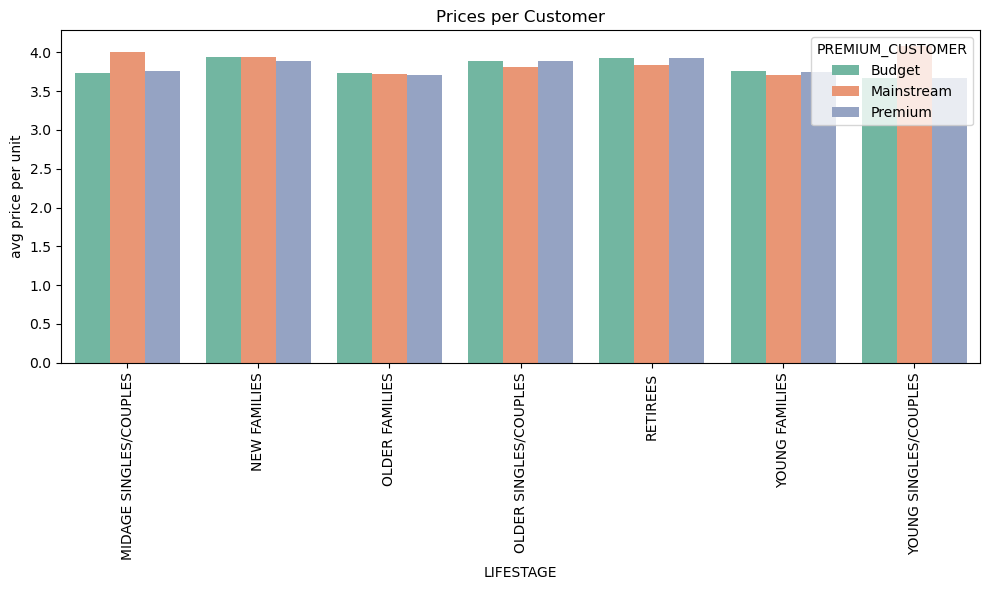

In [326]:
plt.figure(figsize = (10,6))
sns.barplot(data =avg_prices_sales , x ="LIFESTAGE", y ="avg_unit_prices", hue = "PREMIUM_CUSTOMER", errorbar= None, palette="Set2")
plt.title("Prices per Customer")
plt.ylabel("avg price per unit")
plt.xticks(rotation= 90)
plt.tight_layout()


## Mainstream midage and young singles/couples are more willing to pay more per packet of chip compared to their budget and premium segment

As the difference in average price per unit isn’t large, we can check if this difference is statistically different

# two sample t- test (Welch’s t-test )

In [327]:
from scipy.stats import ttest_ind

avg_prices_sales["PREMIUM_CUSTOMER"]== "Mainstream"

group1 = avg_prices_sales.loc[
    (avg_prices_sales["PREMIUM_CUSTOMER"]== "Mainstream") & 
    (avg_prices_sales["LIFESTAGE"].isin (["MIDAGE SINGLES/COUPLES","YOUNG SINGLES/COUPLES"]))]

group2 = avg_prices_sales.loc[
    (avg_prices_sales["PREMIUM_CUSTOMER"]!= "Mainstream") & 
    (avg_prices_sales["LIFESTAGE"].isin (["MIDAGE SINGLES/COUPLES","YOUNG SINGLES/COUPLES"]))]

print(group1)
print(group2)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES  PROD_QTY  \
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85     22699   
19   YOUNG SINGLES/COUPLES       Mainstream  157621.60     38632   

    avg_unit_prices  
1          4.000346  
19         4.080079  
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES  PROD_QTY  \
0   MIDAGE SINGLES/COUPLES           Budget   35514.80      9496   
2   MIDAGE SINGLES/COUPLES          Premium   58432.65     15526   
18   YOUNG SINGLES/COUPLES           Budget   61141.60     16671   
20   YOUNG SINGLES/COUPLES          Premium   41642.10     11331   

    avg_unit_prices  
0          3.739975  
2          3.763535  
18         3.667542  
20         3.675060  


In [328]:
ttest_ind(group1["avg_unit_prices"], group2['avg_unit_prices'], equal_var = False)

Ttest_indResult(statistic=7.081639382806015, pvalue=0.026815318696363374)

# The p value is less than 0.05. hence we reject the null hypothesis. The unit prices of Mainstream in midage and young singles/couples are significantly higher than that Budget and Premium in same customer segements

Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to
buy a particular brand of chips

In [341]:
cleaned_df.head()
M_Y_S_C = cleaned_df.loc[(cleaned_df["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")&
                          (cleaned_df["PREMIUM_CUSTOMER"]=="Mainstream")]
Other = cleaned_df.loc[(cleaned_df["LIFESTAGE"]!="YOUNG SINGLES/COUPLES")&
                          (cleaned_df["PREMIUM_CUSTOMER"]!="Mainstream")]
                       

Kettle        3844
Pringles      2315
Doritos       2238
Smiths        1857
Thins         1166
Infuzions      962
Twisties       900
Tostitos       890
Old            867
Cobs           864
RRD            639
Tyrrells       619
Grain          576
WW             423
Cheezels       346
Red            330
Natural        321
Dorito         303
Infzns         288
CCs            222
Woolworths     176
Cheetos        166
Smith          131
French          78
NCC             73
Snbts           71
GrnWves         70
Burger          62
Sunbites        57
Name: Brand name, dtype: int64

In [371]:
quantity_segment1_by_brand = M_Y_S_C.groupby("Brand name")["PROD_QTY"].sum() / M_Y_S_C["PROD_QTY"].sum()
quantity_segment1_by_brand = quantity_segment1_by_brand.reset_index(name="targetSegment")

In [372]:
quantity_segment2_by_brand = Other.groupby("Brand name")["PROD_QTY"].sum()/ Other["PROD_QTY"].sum()
quantity_segment2_by_brand = quantity_segment2_by_brand.reset_index(name="other")

In [380]:
merged_df = pd.merge(quantity_segment1_by_brand,quantity_segment2_by_brand,on= "Brand name")

merged_df["affinityToBrand"] = merged_df["targetSegment"]/ merged_df["other"]
merged_df= merged_df.sort_values(by= "affinityToBrand", ascending = False)
merged_df

,Brand name,targetSegment,other,affinityToBrand
26,Tyrrells,0.029587,0.023968,1.234445
5,Dorito,0.014729,0.011986,1.228864
25,Twisties,0.043306,0.035356,1.224868
12,Kettle,0.185649,0.155244,1.195855
11,Infzns,0.014004,0.011717,1.195195
24,Tostitos,0.042581,0.035745,1.191260
15,Old,0.041598,0.034931,1.190841
16,Pringles,0.111980,0.094241,1.188232
8,Grain,0.027309,0.023200,1.177096
4,Cobs,0.041856,0.035837,1.167979


# Mainstream- young singles/couples are 23% more buying Tyrrells than other segments; they are 55% less to buy Burger compared to others